In [1]:
import pandas as pd
from textblob import TextBlob 
import matplotlib.pyplot as plt
import seaborn as sns 

In [10]:
df =  pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [3]:
df


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [12]:
df=df[['Title', 'Review Text','Rating', 'Division Name', 'Department Name']]
df.columns=df.columns.str.lower()
df

,title,review text,rating,division name,department name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops
...,...,...,...,...,...
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,General Petite,Dresses
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,General Petite,Tops
23483,"Cute, but see through","This fit well, but the top was very see throug...",3,General Petite,Dresses
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,General,Dresses


EDA - with descriptive statistics (eg describe(), shape, info()) and/or simple charts, explore and familiarise yourself with the data at your own pace - clarify what each column means/contains and what cleaning steps could be employed (and if needed for our scenario)

In [14]:
df.describe()

,rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [16]:
df.shape

(23486, 5)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division name    23472 non-null  object
 4   department name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


In [21]:
df['rating'].unique()

array([4, 5, 3, 2, 1])

In [22]:
df['division name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [23]:
df['department name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [27]:
df2=df.groupby(['division name'])
df2

In [63]:
df2=df.groupby(['division name','department name']).agg({'rating': 'mean'}).reset_index()
df2


,division name,department name,rating
0,General,Bottoms,4.268686
1,General,Dresses,4.163003
2,General,Jackets,4.240310
3,General,Tops,4.148749
4,General,Trend,3.822917
5,General Petite,Bottoms,4.329356
6,General Petite,Dresses,4.133256
7,General Petite,Intimate,4.240343
8,General Petite,Jackets,4.304910
9,General Petite,Tops,4.216469


<AxesSubplot:ylabel='division name'>

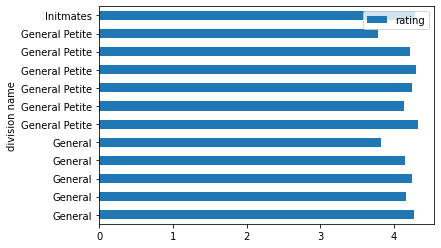

In [73]:
df2.plot(x='division name', kind='barh')

do a spot /sample check on the review column, index position 5 (hint: iloc/loc/at) to apply textblob over the selected review text (image clothing_sentiment_index5.png) Do this for at least 3 samples to evaluate the accuracy of the sentiment polarity and subjectivity against the text itself

In [82]:
print(TextBlob(df.at[50,'review text']).sentiment)
TextBlob(df.at[50,'review text'])


Sentiment(polarity=0.40303030303030307, subjectivity=0.6393939393939394)


TextBlob("This is a cute top that can transition easily from summer to fall. it fits well, nice print and it's comfortable. i tried this on in the store, but did not purchase it because the color washed me out. this is not the best color for a blonde. would look much better on a brunette. if this was in a different color i most likely would have purchased it.")

In [83]:
print(TextBlob(df.at[665,'review text']).sentiment)
TextBlob(df.at[665,'review text'])


Sentiment(polarity=0.3, subjectivity=0.5404761904761904)


TextBlob("Received many compliments the first day i wore them.. amazing fit. disagree with the other post. the
quality is amazing. i wish they had other colors. bought xs")

In [84]:
print(TextBlob(df.at[1000,'review text']).sentiment)
TextBlob(df.at[1000,'review text'])


Sentiment(polarity=0.3527777777777778, subjectivity=0.5388888888888889)


TextBlob("Warn and super soft. love it !")

In [86]:
TextBlob(df.at[50,'review text']).sentences


[Sentence("This is a cute top that can transition easily from summer to fall."),
 Sentence("it fits well, nice print and it's comfortable."),
 Sentence("i tried this on in the store, but did not purchase it because the color washed me out."),
 Sentence("this is not the best color for a blonde."),
 Sentence("would look much better on a brunette."),
 Sentence("if this was in a different color i most likely would have purchased it.")]

In [117]:
df=df.dropna(subset =['review text'])
df=df.reset_index()
df

,level_0,index,title,review text,rating,division name,department name,polarity,subjectivity
0,0,0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,0.633333,0.933333
1,1,1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,0.339583,0.725000
2,2,2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675,0.356294
3,3,3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000,0.625000
4,4,4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,0.512891,0.568750
...,...,...,...,...,...,...,...,...,...
22636,22636,23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,General Petite,Dresses,0.552667,0.710000
22637,22637,23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,General Petite,Tops,0.091667,0.708333
22638,22638,23483,"Cute, but see through","This fit well, but the top was very see throug...",3,General Petite,Dresses,0.414286,0.596429
22639,22639,23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,General,Dresses,0.322222,0.577778


define a function with lambda (or other preferred method) to calculate sentiment polarity for each row of the filtered review data set, as a new column on the data frame. 

In [95]:
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except: return None

In [100]:
df['polarity']=df['review text'].apply(sentiment).apply(lambda x:x[0])
df['subjectivity']=df['review text'].apply(sentiment).apply(lambda x:x[1])

<ipython-input-100-06d3bc2501df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity']=df['review text'].apply(sentiment).apply(lambda x:x[0])
<ipython-input-100-06d3bc2501df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subjectivity']=df['review text'].apply(sentiment).apply(lambda x:x[1])


In [102]:
df.reset_index()

,index,title,review text,rating,division name,department name,polarity,subjectivity
0,0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,0.633333,0.933333
1,1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,0.339583,0.725000
2,2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675,0.356294
3,3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000,0.625000
4,4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,0.512891,0.568750
...,...,...,...,...,...,...,...,...
22636,23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,General Petite,Dresses,0.552667,0.710000
22637,23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,General Petite,Tops,0.091667,0.708333
22638,23483,"Cute, but see through","This fit well, but the top was very see throug...",3,General Petite,Dresses,0.414286,0.596429
22639,23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,General,Dresses,0.322222,0.577778


using the pandas groupby function again, summarise the minimum review polarity, by division and department as a new dataframe (image clothing_min_review.png) - this means whats the lowest sentiment score seen in each department and division - so everything will be less than 0

In [112]:
df1=pd.DataFrame(df.groupby(['division name', 'department name'])['polarity'].min())
df1=df1.reset_index()

<AxesSubplot:xlabel='polarity', ylabel='department name'>

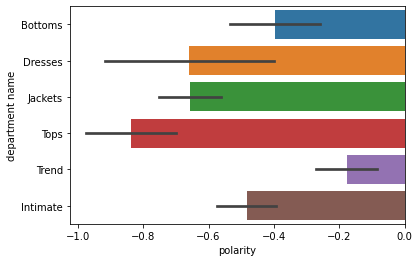

In [113]:
sns.barplot(x='polarity',y='department name',data=df1)

In [114]:
df1=pd.DataFrame(df.groupby(['division name', 'department name'])['polarity'].mean())
df1=df1.reset_index()

<AxesSubplot:xlabel='polarity', ylabel='department name'>

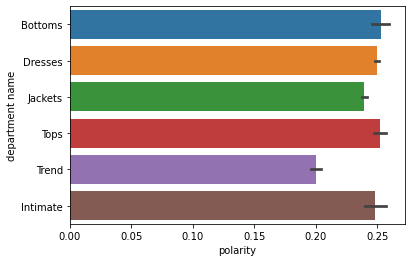

In [115]:
sns.barplot(x='polarity',y='department name',data=df1)